In [2]:
#Import packages
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import pandas as p
from Bio import Phylo as b
from sklearn import cluster as cl
import pickle

In [7]:
#Load data (newick file)
tree = b.read('phylotree.nw', 'newick')
df = p.read_pickle('phylotree.pickle')
df

,distance,id,label,length,parent,type
0,0.00000,0,0,0.00000,None,root
1,0.00000,1,1,0.00000,0,node
2,0.00000,2,2,0.00000,1,node
3,0.00000,3,3,0.00000,2,node
4,0.00000,4,4,0.00000,3,node
5,0.00000,5,5,0.00000,4,node
6,0.00011,6,6,0.00011,5,node
7,0.00011,7,7,0.00000,6,node
8,0.00038,8,8,0.00027,7,node
9,0.00187,9,9,0.00149,8,node


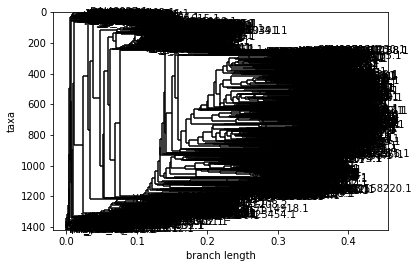

     , BAI48037.1
    ,|
   ,|| NP_001093402.1
   ||
   || pdb|1VJC|A
  ,|
  ||, EPY74493.1
  |||
  ||| XP_006193243.1
  |||
  | , XP_006219647.1
  | |
  | | XP_010986031.1
  | |
  | | XP_010948895.1
  |
  |   , ABD65252.1
  |  ,|
  | _||_____ ELW65896.1
  || |
  || | ABF83580.1
  ,|
  || , XP_007184281.1
  ||,|
  |||| XP_004280490.1
  |||
  | |, XP_007119938.1
  | ||
  |  | XP_007447411.1
  |
  | , XP_020771144.1
  |_|
  | |, XP_006051590.1
  | ||
  |  , NP_001029471.1
  |  |
  |  | NP_001135988.1
  |
  |, XP_023489951.1
  ||
  || P00559.2
  ,|
  || , pdb|1KF0|A
 ,||_|
 ||  |_______ pdb|1HDI|A
 ||
 ||_ XP_004442122.1
 ||
 |, XP_019503735.1
 ||
 || XP_019569153.1
 ||
 || , XP_004867540.1
 ||,|
 |||| XP_010639630.1
 |||
 |||_ XP_005412687.1
 |||
 | |_ XP_004648159.1
 | |
 | | XP_003471020.1
 |
 |_ XP_012884385.1
 |
 |    ____ XP_008160566.1
 |  _|
 | | |___ ELK38202.1
 | |
 | | _ XP_014721453.1
 | ||
 |,|| XP_008508104.1
 |||
 ||| __ EPQ11828.1
 ||||
 || | XP_005872923.1
 ||
 || _ XP_00

 || ||  | |||       |  |  | |   __________ XP_018574219.1
 || ||  | |||       |  |  | |__|
 || ||  | |||       |  |  |    |          , AEE63606.1
 || ||  | |||       |  |  |    |__________|
 || ||  | |||       |  |  |               | XP_019769148.1
 || ||  | |||       |  |  |
 || ||  | |||       |  |  |      _____ XP_011568970.1
 || ||  | |||       |  |  |     |
 || ||  | |||       |  |  |     |  ___ OWR43923.1
 || ||  | |||       |  |  |     |,|
 || ||  | |||       |  |  |     |||  _ XP_013144689.1
 || ||  | |||       |  |  |     |||_|
 || ||  | |||       |  |  |     ||  | _ XP_014369493.1
 || ||  | |||       |  |  |_____||  ||
 || ||  | |||       |  |  |     ||   | , KPI95475.1
 || ||  | |||       |  |  |     ||   |_|
 || ||  | |||       |  |  |     ||     | NP_001299475.1
 || ||  | |||       |  |  |     ||
 || ||  | |||       | ,|  |     ||    , ALA09393.1
 || ||  | |||       | ||  |     ||  __|
 || ||  | |||       | || ,|     || |  | XP_022826232.1
 || ||  | |||       | || ||     |

In [8]:
#Plot tree
b.draw(tree)
b.draw_ascii(tree)

In [ ]:
#Attempt niave clustering
